In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/ANKIT PC/Desktop/learning intrvention(classification)/AirlinesCluster (1).csv')
df.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [4]:
df.shape

(3999, 7)

In [5]:
from scipy.stats import zscore
from sklearn.cluster import KMeans

df_scaled=df.apply(zscore)
df_scaled.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975


### we need to find optimal k and  scree plot

In [12]:
cluster_range=range(1,8)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
    clusters.fit(df_scaled) ##take that clusters on scaled dataset
    labels=clusters.labels_ ## k values
    centroids= clusters.cluster_centers_ ##within that hat is centriod
    cluster_errors.append(clusters.inertia_) ##within cluster sum f squares
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]    ##calaculating errors. by default eudidian distance

,num_clusters,cluster_errors
0,1,27993.000000
1,2,21991.297326
2,3,18132.529382
3,4,15489.974857
4,5,13514.643730
5,6,12157.513412
6,7,11046.103752


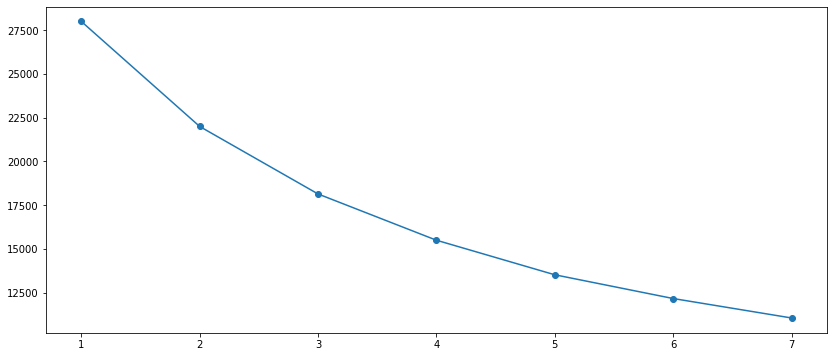

In [13]:
plt.figure(figsize=(14,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [14]:
K_mean=KMeans(n_clusters=4,n_init=15,random_state=123)
K_mean.fit(df_scaled)
centroids=K_mean.cluster_centers_
centroids

array([[-0.33376664, -0.13173474, -0.46399404, -0.4662072 , -0.19755018,
        -0.21514341, -0.25388823],
       [ 1.16858509,  0.42759421,  0.66669323,  1.74287288,  3.80549125,
         4.07370948,  0.25744667],
       [ 0.59587314, -0.09853117,  0.96830659,  0.84236304, -0.03407616,
        -0.02810195,  0.55222322],
       [ 0.39187235,  6.91711323,  0.08865315,  0.07557172,  0.35034573,
         0.37427446, -0.13674898]])

In [15]:
K_mean.labels_

df_labels=pd.DataFrame(K_mean.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [16]:
df_labeled=df.join(df_labels)
df_labeled.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,labels
0,28143,0,174,1,0,0,7000,0
1,19244,0,215,2,0,0,6968,0
2,41354,0,4123,4,0,0,7034,0
3,14776,0,500,1,0,0,6952,0
4,97752,0,43300,26,2077,4,6935,2


In [20]:
##displaying cluster for 0 
df_labeled[df_labeled.labels==0].head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,labels
0,28143,0,174,1,0,0,7000,0
1,19244,0,215,2,0,0,6968,0
2,41354,0,4123,4,0,0,7034,0
3,14776,0,500,1,0,0,6952,0
5,16420,0,0,0,0,0,6942,0


In [19]:

df_labeled[df_labeled.labels==1].head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,labels
8,443003,0,1753,43,3850,12,6948,1
22,20584,0,3450,11,3450,11,6884,1
50,108137,0,6368,5,6368,5,6844,1
65,53914,0,33767,45,5550,29,6826,1
94,185549,0,110859,39,2950,16,6778,1


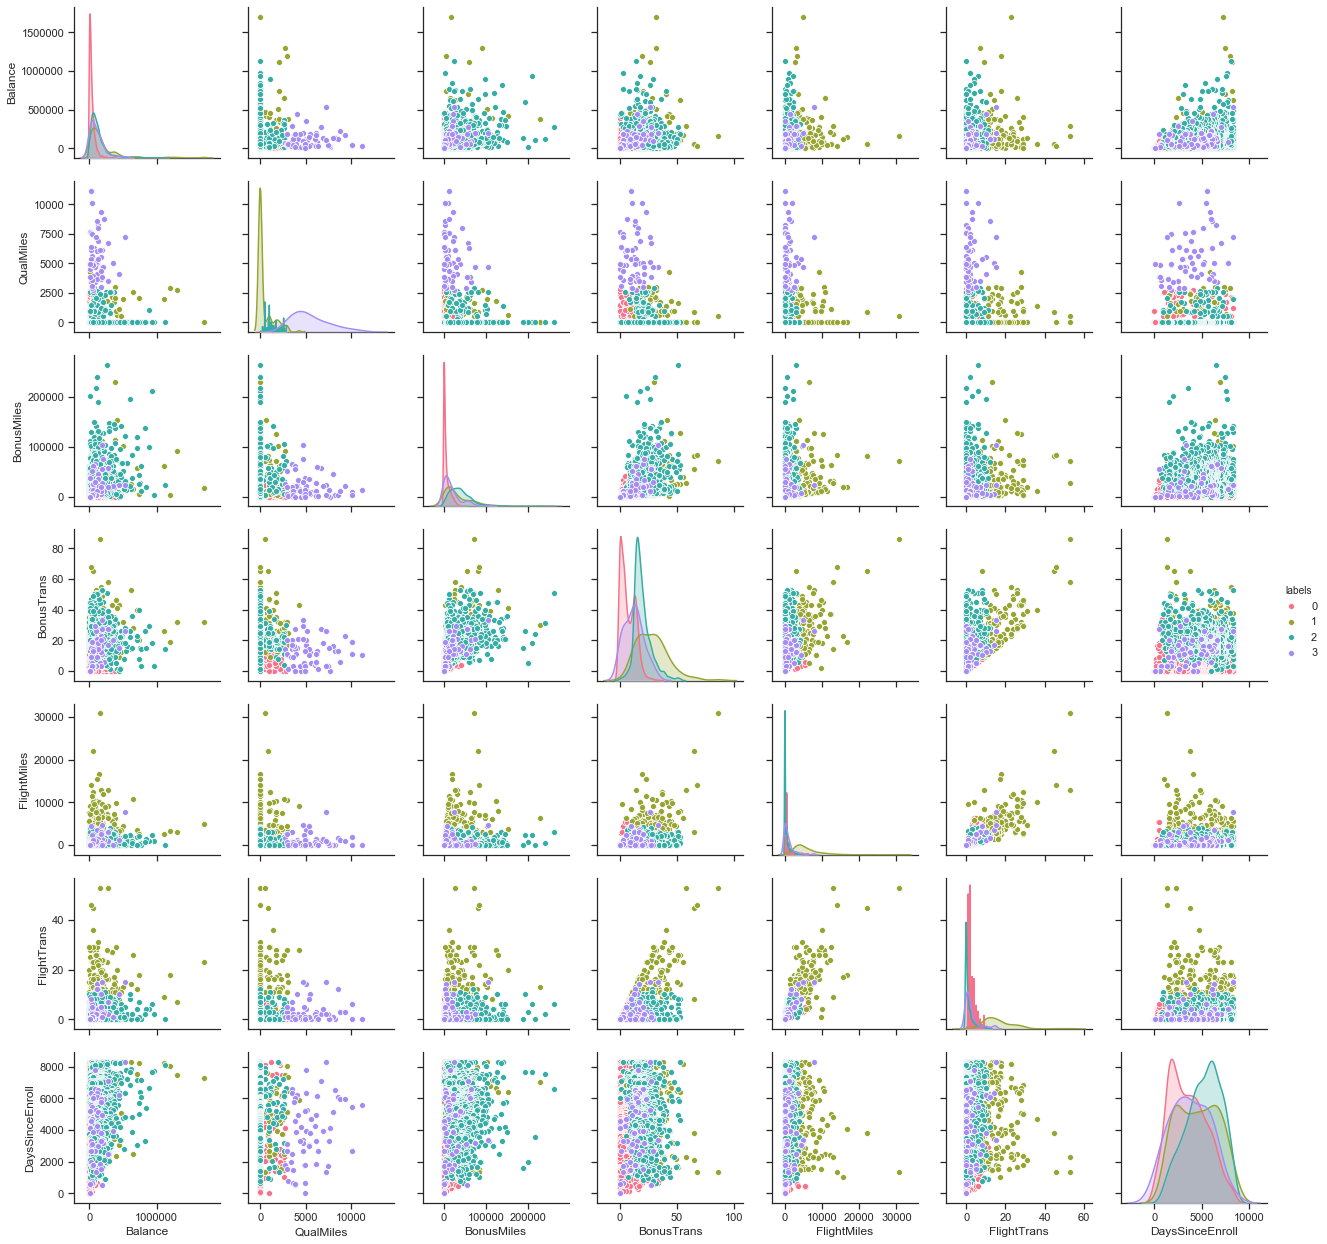

In [38]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df_labeled,vars=['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles',
                      'FlightTrans','DaysSinceEnroll'],palette='husl',hue='labels')

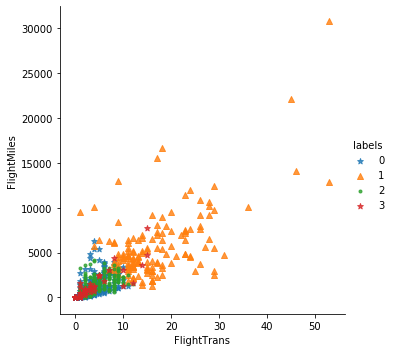

In [30]:
markers=['*','^','.','*']
sns.lmplot('FlightTrans','FlightMiles',data=df_labeled,hue='labels',fit_reg=False,markers=markers)
plt.show()

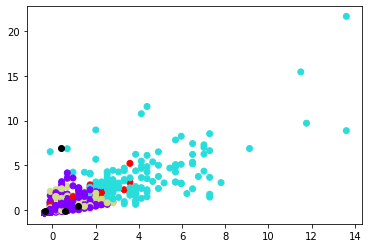

In [31]:
plt.scatter(df_scaled['FlightTrans'],df_scaled['FlightMiles'],c=df_labeled['labels'].astype(float),cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],c='black',cmap='rainbow')

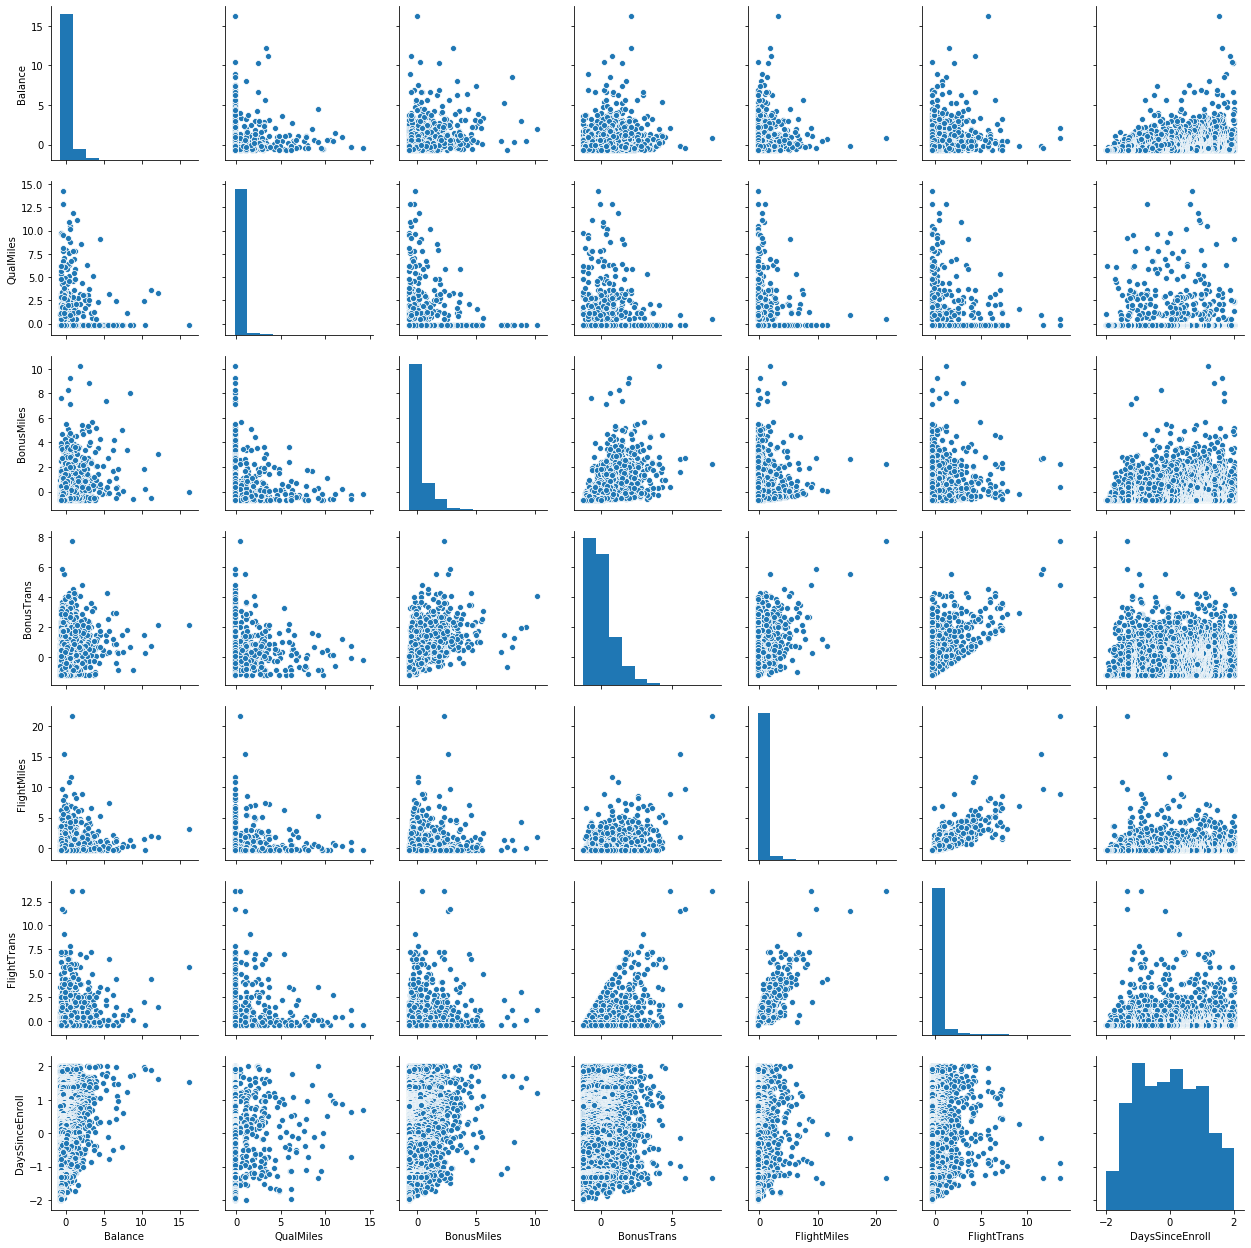

In [28]:
sns.pairplot(df_scaled)